In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from numpy.linalg import multi_dot, inv
%matplotlib inline

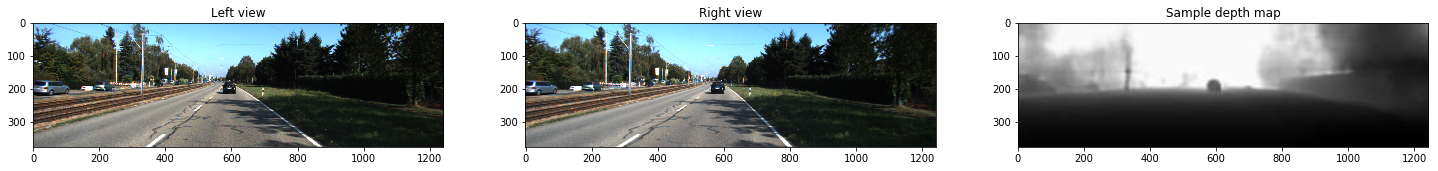

In [2]:
image_idx = 11
image_dir = '/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0015_sync/'
left_view = mpimg.imread(image_dir + 'image_02/data/' + "{:010}".format(image_idx) + '.png')
right_view = mpimg.imread(image_dir + 'image_03/data/' + "{:010}".format(image_idx) + '.png')

ref = mpimg.imread('/home/szuyu/workspace/semodepth/encode/2011_09_26_drive_0015/0000000011.jpg', 0)
ref = ref / 3 #reverse previous enhancement
ref = cv2.resize(ref, (left_view.shape[1], left_view.shape[0]))

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,6))
ax1.set_title('Left view')
ax1.imshow(left_view)
ax2.set_title('Right view')
ax2.imshow(right_view)
ax3.imshow(ref, cmap='gray')
ax3.set_title("Sample depth map")
plt.show()

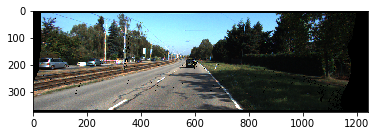

In [3]:
from src.loss import *
A = reconstruct(ref, np.array(left_view), 'L2R')
plt.imshow(A)
plt.show()

In [4]:
recon_loss(right_view, A)

5164.0288

In [5]:
from src.preprocess import *
velo_path = image_dir + 'velodyne_points/data/'
image_path = image_dir + 'image_02/data'

v2c_filepath = '/data/KITTI/KITTI_RAW/2011_09_26/calib_velo_to_cam.txt'
c2c_filepath = '/data/KITTI/KITTI_RAW/2011_09_26/calib_cam_to_cam.txt'

dots = crop_lidar(image_path,velo_path,v2c_filepath,c2c_filepath, frame_id=image_idx)
gt_loss(ref, dots)

476.9994

In [6]:
import os, glob
filesDepth3 = glob.glob('/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0009_sync')
training_list = list(filter(lambda f: os.path.isdir(f), filesDepth3))
from src.preprocess import *

#dset='/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0009_sync'
#ground_truth_preprocess(dset)
for dset in training_list:
    print(dset)
    ground_truth_preprocess(dset) #'2011_09_26_drive_0015_sync/'

/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0009_sync
['groundtruth/2011_09_26/2011_09_26_drive_0009_sync/image_02/data', 'groundtruth/2011_09_26/2011_09_26_drive_0009_sync/image_03/data']
Save processed gt files to: groundtruth/2011_09_26/2011_09_26_drive_0009_sync/image_02/data
Save processed gt files to: groundtruth/2011_09_26/2011_09_26_drive_0009_sync/image_03/data


TypeError: 'generator' object is not subscriptable

0


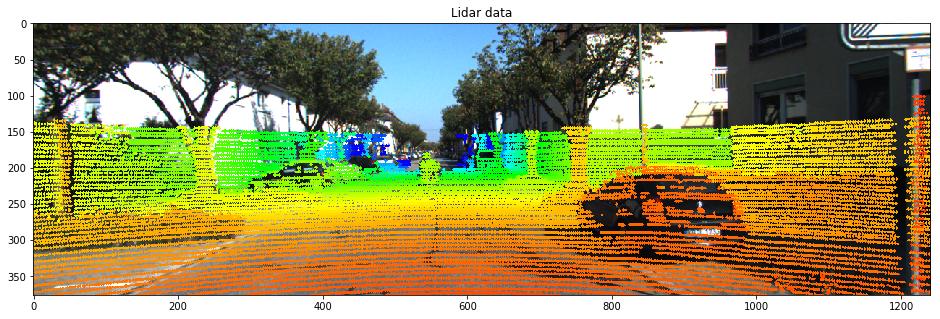

In [10]:
import matplotlib.image as mpimg
import numpy as np
import random
idx = 0#random.randint(0, 100)
im = mpimg.imread('/data/KITTI/KITTI_RAW/2011_09_29/2011_09_29_drive_0071_sync/' + 'image_02/data/' + "{:010}".format(idx) + '.png')
c = './groundtruth/2011_09_29/2011_09_29_drive_0071_sync/image_02/data/' + "{:010}".format(idx) + '.csv'
d = np.genfromtxt(c, delimiter=',')
#d = np.load(c)
show_lidar(im, d)
print(idx)

In [6]:
"""
1. I don't really care what's in your blood.
2. Okay thank you for telling me your name Janel. 
3. At which age you picked up your first guitar is no big deal to me.
YOU GUYS DONT NEED TO TELL ME EVERYTIME WHEN I LISTEN TO A FKING YOUTUBE SONG.
"""

In [4]:
training_list[0][:32]

'/data/KITTI/KITTI_RAW/2011_10_03'